# Importing neccessary packages

            

In [20]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp
import opendatasets as od
from scipy import ndimage
from shutil import copyfile
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Downloading the dataset

In [2]:
dataset = 'https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data' #locally saved dataset
od.download(dataset) #downloading the dataset 

Skipping, found downloaded files in ".\dog-vs-cat-images-data" (use force=True to force download)


# Testing data import

In [3]:
class_names = ["Cat", "Dog"]
dogs = len(os.listdir('dog-vs-cat-images-data/dogcat/train/dogs'))
cats = len(os.listdir('dog-vs-cat-images-data/dogcat/train/cats'))
images = [cats, dogs]
px.pie(names= class_names, values= images).show()


#figure printed out shows the data input is balanced

# Verify the dataset

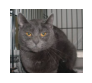

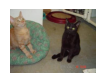

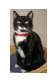

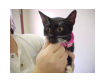

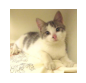

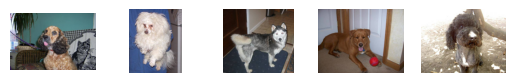

In [4]:
for i in range(5):
    cat_dir = "dog-vs-cat-images-data/dogcat/train/cats"
    random_photo = random.choice(os.listdir(cat_dir))
    photo_path = os.path.join(cat_dir, random_photo)
    image = mpimg.imread(photo_path)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(image)
    plt.show()

for i in range(5):
    dog_dir = "dog-vs-cat-images-data/dogcat/train/dogs"
    random_photo = random.choice(os.listdir(dog_dir))
    photo_path = os.path.join(dog_dir, random_photo)
    image = mpimg.imread(photo_path)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(image)
    plt.show



# Creating the Convolutional Base

First need to create the Generators

In [11]:
train = ImageDataGenerator(
        rescale=1./255)

validation = ImageDataGenerator(
        rescale = 1./255
)

test = ImageDataGenerator(
        rescale = 1./255
)

train_generator = train.flow_from_directory(
    "dog-vs-cat-images-data/dogcat/train",
    target_size=(150, 150),
    batch_size= 750,
    class_mode="binary"
)

validation_generator = validation.flow_from_directory(
    "dog-vs-cat-images-data/dogcat/validation",
    target_size = (150, 150),
    batch_size = 750,
    class_mode ="binary"
)

test_generator = test.flow_from_directory(
        'dog-vs-cat-images-data/dogcat/test1',
        target_size=(150, 150),
        batch_size= 750,
        class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


# Testing data from each class


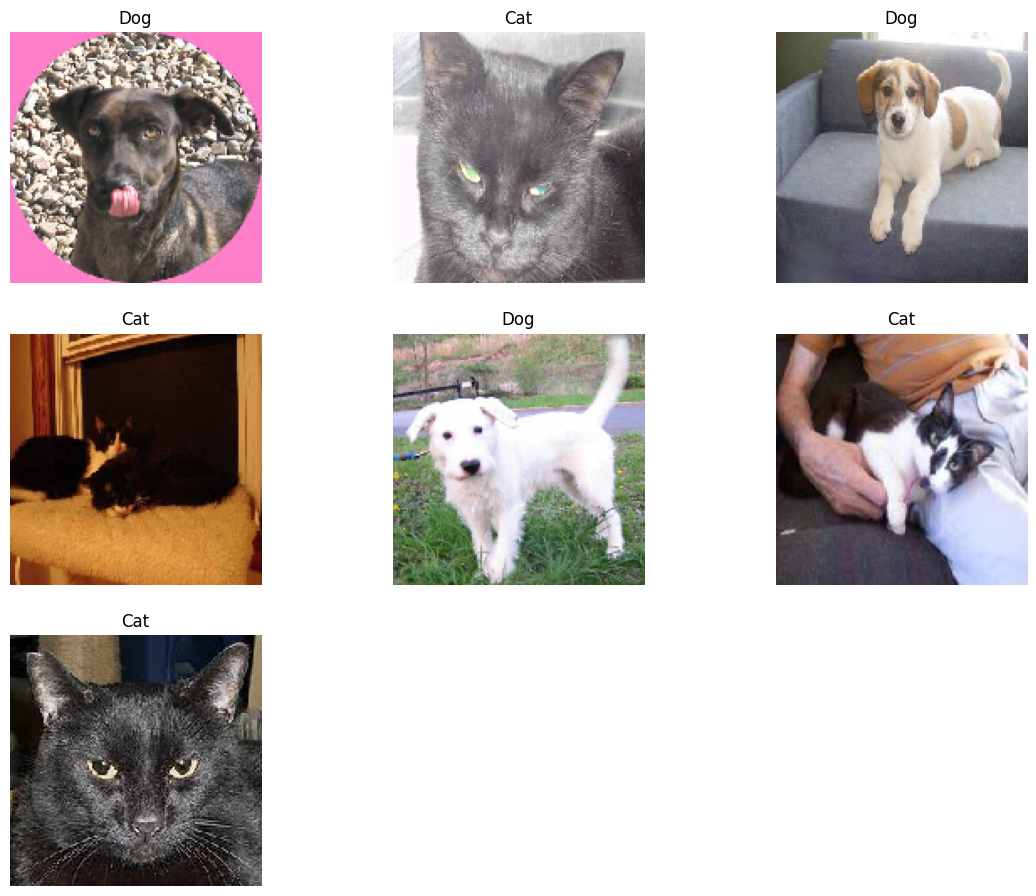

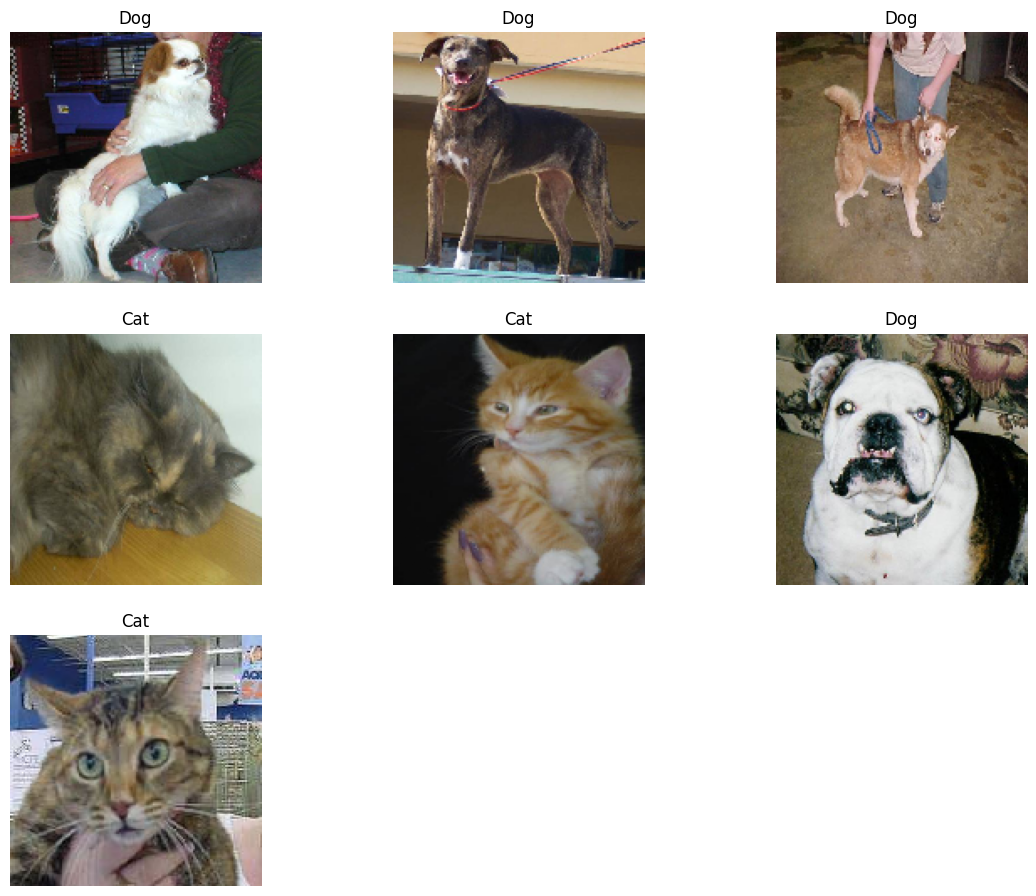

In [12]:
class_names = ["Cat", "Dog"]

def plot_data(generator, num_images):
    i = 1
    images, labels = next(generator)  # Fetch batch of images and labels
    labels = labels.astype('int32')  # Ensure labels are in integer format

    plt.figure(figsize=(14, 15))  # Create a new figure

    # Plot images
    for image, label in zip(images, labels):
        if i > num_images:  # Stop when we've plotted enough images
            break
        plt.subplot(4, 3, i)  # Define a 4x3 grid of subplots
        plt.imshow(image)  # Display image
        plt.title(class_names[label])  # Show the corresponding class name
        plt.axis('off')  # Turn off the axis
        i += 1  # Increment counter
    
    plt.show()  # Show all images after the loop

# Example usage with 7 images:
plot_data(train_generator, 7)
plot_data(validation_generator, 7)


# Creating the model


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Input shape adjusted
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

# Adding dense layers

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs = 4,  # You can adjust the number of epochs
    validation_data=validation_generator,
)

Epoch 1/4
34/34 ━━━━━━━━━━━━━━━━━━━━ 242s 6s/step - accuracy: 0.5364 - loss: 0.6951 - val_accuracy: 0.5001 - val_loss: 0.6918
Epoch 2/4
34/34 ━━━━━━━━━━━━━━━━━━━━ 251s 7s/step - accuracy: 0.5637 - loss: 0.6747 - val_accuracy: 0.6669 - val_loss: 0.6100
Epoch 3/4
34/34 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.6791 - loss: 0.5938 - val_accuracy: 0.7136 - val_loss: 0.5605
Epoch 4/4
34/34 ━━━━━━━━━━━━━━━━━━━━ 398s 11s/step - accuracy: 0.7181 - loss: 0.5526 - val_accuracy: 0.7370 - val_loss: 0.5252


## Evaluating the model

17/17 - 50s - 3s/step - accuracy: 0.5160 - loss: 1.0715


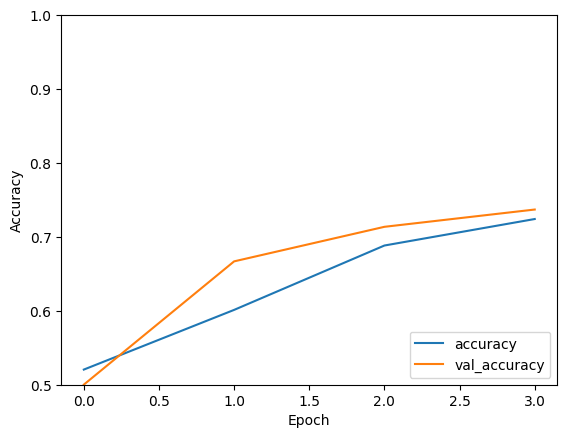

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step


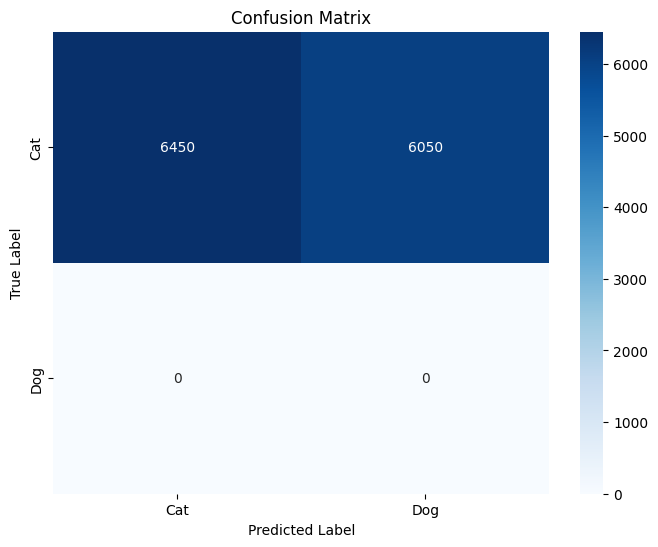

In [28]:
#confusion matrix

# Step 1: Generate predictions from the test set
Y_pred = model.predict(test_generator)
Y_pred = np.round(Y_pred).astype(int)  # Rounding to 0 or 1 since it's binary classification

# Step 2: Get the true labels from the test generator
y_true = test_generator.classes

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_true, Y_pred)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Testing the model

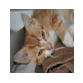

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
The model predicts that this is a dog with a confidence of 0.59


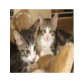

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The model predicts that this is a cat with a confidence of 0.62


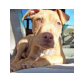

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The model predicts that this is a dog with a confidence of 0.81


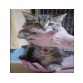

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The model predicts that this is a cat with a confidence of 0.54


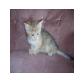

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The model predicts that this is a cat with a confidence of 0.73


In [36]:
for i in range(5):
    test_dir = 'dog-vs-cat-images-data/dogcat/test1/test1'
    random_photo = random.choice(os.listdir(test_dir))
    photo_path = os.path.join(test_dir, random_photo)
    img = image.load_img(photo_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(img)
    plt.show()

    # Make the prediction
    prediction = model.predict(img_array)

# Print the prediction
    if prediction[0] > 0.5:
        print(f"The model predicts that this is a dog with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"The model predicts that this is a cat with a confidence of {1 - prediction[0][0]:.2f}")